In [1]:
#Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [2]:
#Dataset
testdata = pd.read_csv('fraudTest.csv')
traindata = pd.read_csv('fraudTrain.csv')

In [3]:
traindata.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploratory Data Analysis (EDA)

0 - non-fraudulent 
1 - fraudulent

In [4]:
#Check for missing values in columns:
print(traindata.shape)
traindata.isna().sum()
testdata[testdata.duplicated()]

#if missing values/duplicate rows are given, drop entire row (here: none)
traindata.dropna(inplace=True)
traindata.drop_duplicates(inplace=True)
df_testdata = traindata
print(df_testdata.shape)

(1296675, 23)
(1296675, 23)


Drop outliers if necessary to generalize ML model better:

In [5]:
df_testdata.amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [6]:
#Add colum with "yes/no" indicating non-/fraudulent transactions:
df_testdata['is_fraud_string']=df_testdata['is_fraud']
df_testdata.replace({'is_fraud_string': {0:'no', 1:'yes'} });

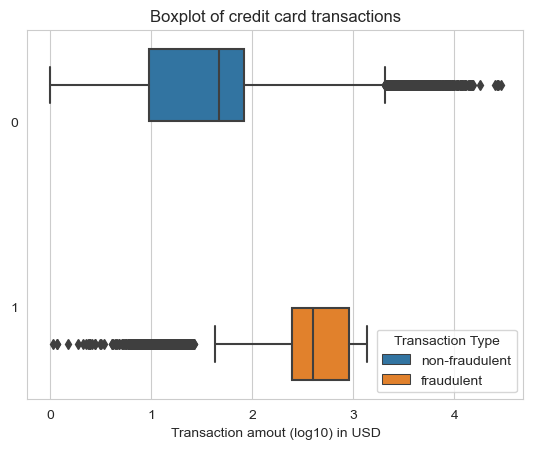

545.9926000000002

In [7]:
#Overview of Transactions:
sns.set_style('whitegrid')
sns.boxplot(data = df_testdata, x = np.log10(df_testdata.amt), y='is_fraud', hue='is_fraud' ,orient="h")
plt.title('Boxplot of credit card transactions')
plt.xlabel('Transaction amout (log10) in USD')
plt.ylabel('')

#Change legend 
ax = plt.gca()
new_labels = ['non-fraudulent','fraudulent']
for t, l in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)
ax.get_legend().set_title("Transaction Type")
plt.show()

#99 Percentile
np.percentile(df_testdata.amt, 99)

The Boxplot shows that most of the fraudulent transactions occur within higher transaction amounts. Apart from that, the 99% percentile indicates that 99% of the transactions are less than 520 USD and every transaction above can be considered an outlier that might impact the generalisation power of our Machine Learning Model for unseen data in the future. Thus, it is recommended to neglect outliers in the following steps.

Overview after cleaning dataframe:

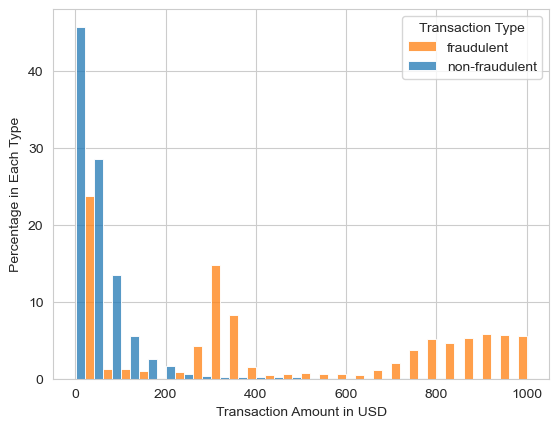

In [8]:
#amount vs. fraud
sns.set_style('whitegrid')
ax=sns.histplot(x='amt', data=df_testdata[df_testdata.amt<=1000], hue='is_fraud', stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title="Transaction Type", labels=['fraudulent','non-fraudulent'])

In [9]:
#Number of fraudulent transactions in dataframe
print('No of fraudulent transactions in dataframe (neglecting outliers): \n')
print(df_testdata['is_fraud'].loc[(df_testdata['is_fraud']==1)&(df_testdata['amt']<=1000)].count())

No of fraudulent transactions in dataframe (neglecting outliers): 

6557


In [10]:
#Neglect rows considered 'outliers':
df=df_testdata.loc[df_testdata['amt']<=1000]
print('Uncleaned dataframe: \n',df_testdata.shape) 
print('Cleaned dataframe: \n', df.shape) 

Uncleaned dataframe: 
 (1296675, 24)
Cleaned dataframe: 
 (1292739, 24)


In [11]:
print(list(df.columns))

['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'is_fraud_string']


Plotting relationships:

C:\Users\mehler alisa\AppData\Local\Temp\ipykernel_23452\3537521051.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year


Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

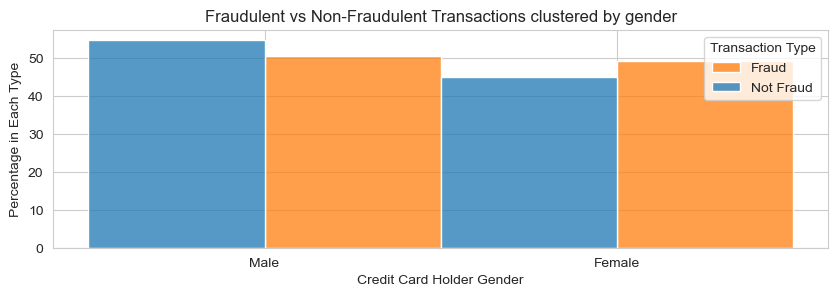

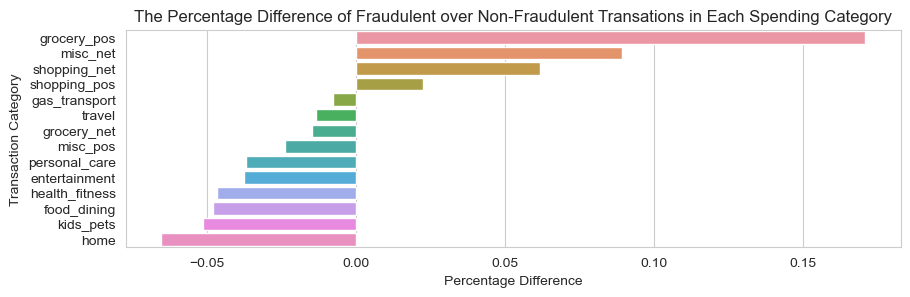

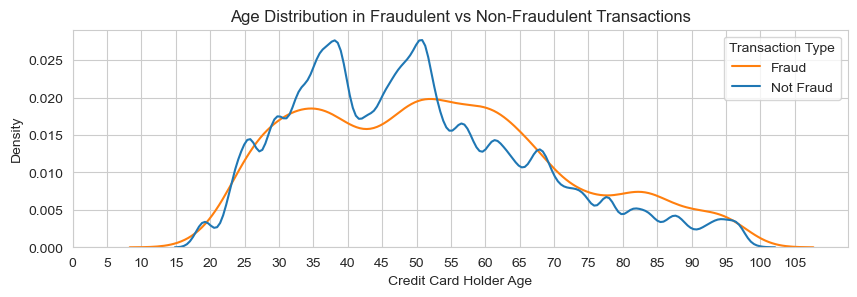

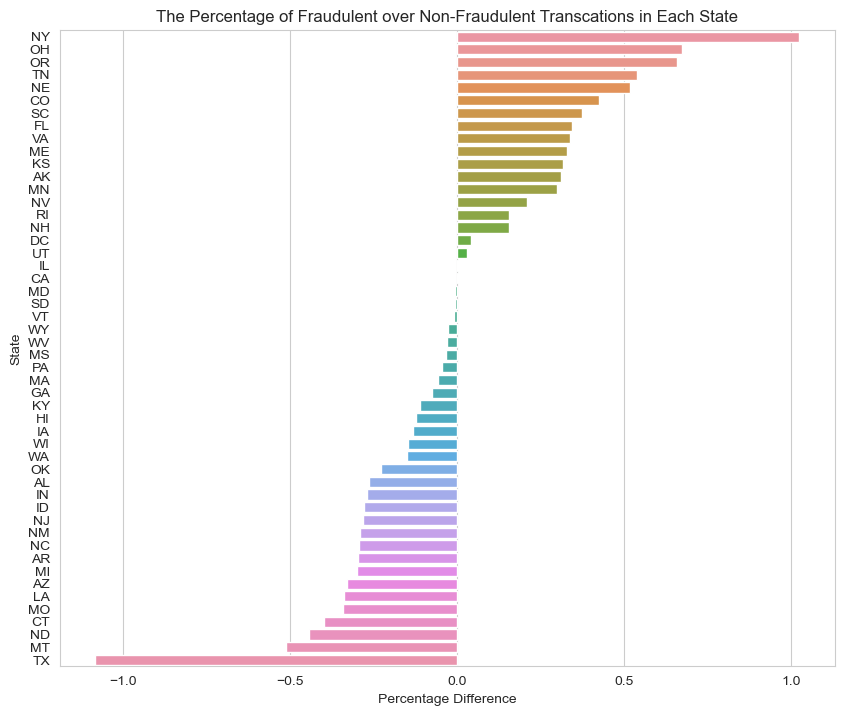

In [12]:
sns.set_style('whitegrid')

#gender vs. fraud
plt.figure(figsize=(10,13))
plt.subplot(4,1,1)
ax=sns.histplot(x='gender',data=df, hue='is_fraud', stat='percent', multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Credit Card Holder Gender')
grouped = df.groupby('gender')['is_fraud'].mean()
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(['Male', 'Female'])
plt.title('Fraudulent vs Non-Fraudulent Transactions clustered by gender')
plt.legend(title="Transaction Type", labels=['Fraud', 'Not Fraud'])



#spending category vs. fraud
plt.figure(figsize=(10,13))
plt.subplot(4,1,2)

a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category')



#age vs. fraud
import datetime as dt
plt.figure(figsize=(10,13))
plt.subplot(4,1,3)
df.loc[:,'age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title="Transaction Type", labels=['Fraud', 'Not Fraud'])



#state vs. fraud
plt.figure(figsize=(10,38))
plt.subplot(4,1,4)
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

#### Gender vs Fraud:
There is no clear difference between genders in terms of fraudulent transactions. Data seem to suggest that females and males are almost equally susceptible to transaction fraud (with a little higher percentage among women which however is not expressive). Gender is not very indicative of a fraudulent transaction

#### Spending Category vs. Fraud:
It is examined in which spending categories fraud happens most predominantly. To do this, firstly the distribution in normal transactions and then the distribution in fraudulent activities is calculated. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if a specific category accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

The result shows that indeed some spending categories are more likely to indicate fraud than others. Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

#### Age vs. Fraud:
The age distribution is different between 2 transaction types. In non-fraudulent transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

#### State vs. Fraud:
As can be seen from the graph, NY and IN among others have a higher percentage of fraudulent transactions than normal ones, while TX and OH are the opposite. However, it should be pointed out that the percentage differences in those states are not very significant but a correlation does exist (the differences are only varying from >-2% to >1,5%)

### Analysis of Cyclicality of fraudulent transactions:

In [13]:
df['trans_date_trans_time']

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1292739, dtype: object

C:\Users\mehler alisa\AppData\Local\Temp\ipykernel_23452\3143159253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
C:\Users\mehler alisa\AppData\Local\Temp\ipykernel_23452\3143159253.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
C:\Users\mehler alisa\AppData\Local\Temp\ipykernel_23452\3143159253.py:28: SettingWithCopyWarning: 
A value is trying to be set o

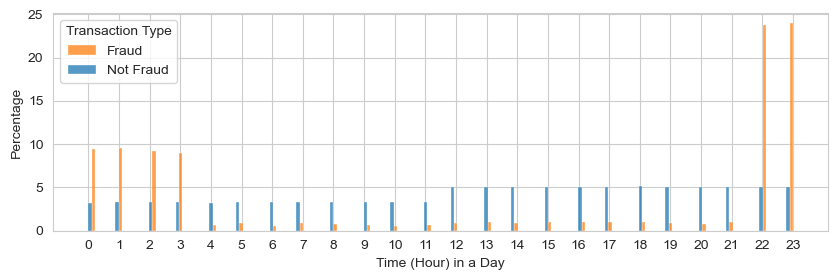

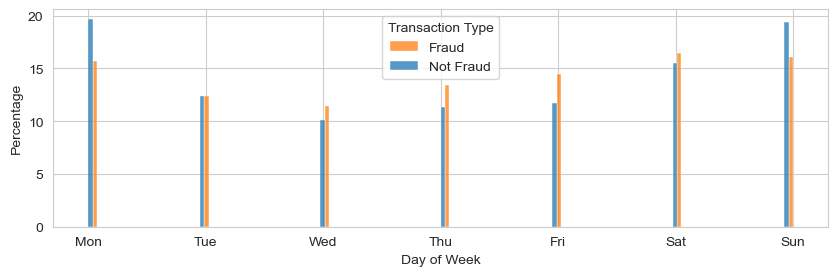

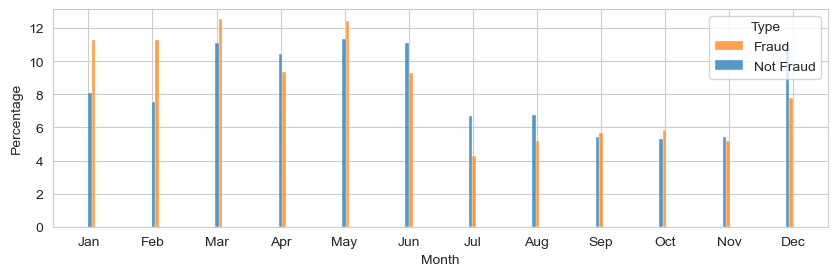

In [14]:
#Hourly trend
plt.figure(figsize=(10,13))
plt.subplot(4,1,1)
df.loc[:,'hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Transaction Type', labels=['Fraud', 'Not Fraud'])


#Weekly trend
plt.figure(figsize=(10,13))
plt.subplot(4,1,2)
df.loc[:,'day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
grouped = df.groupby('day')['is_fraud'].mean()
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Transaction Type', labels=['Fraud', 'Not Fraud'])


#Monthly trend
plt.figure(figsize=(10,13))
plt.subplot(4,1,3)
df.loc[:,'month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [15]:
'''
x=0
for index, row in df.iterrows():
    if pd.to_datetime(row['trans_date_trans_time']).month == 1:
        print(row['trans_date_trans_time'])
        x=x+1

if x==0:
    print('There are no transactions recorded in january') 
'''

"\nx=0\nfor index, row in df.iterrows():\n    if pd.to_datetime(row['trans_date_trans_time']).month == 1:\n        print(row['trans_date_trans_time'])\n        x=x+1\n\nif x==0:\n    print('There are no transactions recorded in january') \n"

#### Hourly trend:
While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight

#### Weekly trend:
Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week with a small peak at the weekend.

#### Monthly trend:
While non-fraudulent payments peak around December (which comes naturally with the Cristmas season), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May, such that a clear seasonal trend can be observed. 

# Fraud Detection Model

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'is_fraud_string', 'age', 'hour',
       'day', 'month'],
      dtype='object')


In [17]:
#convert categorical data entries in the the training and testing dataset into dummy numerical entries:
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

test=testdata
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

In [19]:
#Logistic Regression (Synthetic Minority Oversampling Technique (SMOTE) - Technique: address imbalanced share of fraudulent and non-fraudulent transactions)

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97    553574
           1       0.04      0.75      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719

Confusion matrix:
 [[516722  36852]
 [   532   1613]]
Share of Non-Fraud in Test Data: 0.9961
